# Instacart Purchase Data Analysis

In this project, we'll be taking a look at data from Instacart.

Instacart is a grocery delivery platform where customers can place a grocery order and have it delivered to them, similar to how Uber Eats and Door Dash work. This particular dataset was publicly released by Instacart in 2017 for a Kaggle competition.

For educational purposes, this original dataset has been modified, shortening it and adding some issues to be discovered. The original distributions were preserved.

We will be working on cleaning up and preparing a report that gives insight into the shopping habbits of Instacart customers. 


**Data Dictionary**

There are 5 tables in the dataset:

    instacart_orders.csv: each row corresponds to one order on the Instacart app
        'order_id': ID number that uniquely identifies each order
        'user_id': ID number that uniquely identifies each customer account
        'order_number': the number of times this customer has placed an order
        'order_dow': day of the week that the order placed (which day is 0 is uncertain)
        'order_hour_of_day': hour of the day that the order was placed
        'days_since_prior_order': number of days since this customer placed their previous order
    products.csv: each row corresponds to a unique product that customers can buy
        'product_id': ID number that uniquely identifies each product
        'product_name': name of the product
        'aisle_id': ID number that uniquely identifies each grocery aisle category
        'department_id': ID number that uniquely identifies each grocery department category
    order_products.csv: each row corresponds to one item placed in an order
        'order_id': ID number that uniquely identifies each order
        'product_id': ID number that uniquely identifies each product
        'add_to_cart_order': the sequential order in which each item was placed in the cart
        'reordered': 0 if the customer has never ordered this product before, 1 if they have
    aisles.csv
        'aisle_id': ID number that uniquely identifies each grocery aisle category
        'aisle': name of the aisle
    departments.csv
        'department_id': ID number that uniquely identifies each grocery department category
        'department': name of the department

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
orders.info()
print()
display(orders.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB



,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [3]:
products = pd.read_csv('/datasets/products.csv', sep=';')
products.info()
print()
display(products.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB



,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [4]:
departments = pd.read_csv('/datasets/departments.csv', sep=';')
departments.info()
print()
display(departments.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes



,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [5]:
aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
aisles.info()
print()
display(aisles.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB



,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [6]:
order_products = pd.read_csv('/datasets/order_products.csv', sep=';')
order_products.info(show_counts=True)
print()
display(order_products.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB



,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


**Observations**

I can already see a couple tables in here that we will have to investigate for missing values. orders, products and order_products all have a column with less values than the other. This may be explainable, but it is something we will be digging deeper into.

## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [7]:
# Check for duplicated orders
orders.duplicated().sum()

15

In [8]:
# Check for all orders placed Wednesday at 2:00 AM

# since order_dow is uncertain on what day 0 is, we will assume day 0 is sunday.
# that means wednesday is 3

# scratch the above. According to analytics from below [A3], we are going to assume that 0 is Saturday
# which would make Wednesday be 4

wednesday2_orders = orders[(orders['order_dow'] == 4) & (orders['order_hour_of_day'] == 2)]

print()
display(wednesday2_orders.head())

print('Number of orders place Wednesday at 2am:', wednesday2_orders.size)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
2124,401544,80955,72,4,2,2.0
14847,1913472,138992,16,4,2,6.0
16116,2796392,154904,12,4,2,13.0
16471,2209130,72786,5,4,2,30.0
32120,2235095,89980,18,4,2,7.0


Number of orders place Wednesday at 2am: 684


In [9]:
# Reviewer's code 

orders[(orders['order_dow'] == 3) & (orders['order_hour_of_day'] == 2)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


In [10]:
# Remove duplicate orders
# looking into the duplicates, making sure they actually are duplicates, before we remove them
orders_duplicates = orders.duplicated(keep=False)
display(orders[orders_duplicates])

# now that we verified these rows are in fact duplicates, we can safely remove them

orders = orders.drop_duplicates()


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
30371,1918001,188546,14,3,2,16.0
99462,794638,50898,24,3,2,2.0
119251,408114,68324,4,3,2,18.0
142258,2845099,31189,11,3,2,7.0
145574,794638,50898,24,3,2,2.0
164581,1112182,202304,84,3,2,6.0
200059,1782114,106752,1,3,2,NaN
204042,2125197,14050,48,3,2,3.0
215294,2160484,107525,16,3,2,30.0
223105,2160484,107525,16,3,2,30.0


In [11]:
# Double check for duplicate rows
orders.duplicated().sum()

0

In [12]:
# Double check for duplicate order IDs only
orders.duplicated(subset=['order_id']).sum()

0

**Observations:**

We noticed some duplicates in this table, which could have possibly come from a data collection error or something. Not sure how else we would end up with duplicate orders. 
Also, this may be tricky to work with, because we don't have information on how "order_dow" works -- we are just left to assume what number corresponds with what day. 

### `products` data frame

In [13]:
# Check for fully duplicate rows
products.duplicated().sum()

0

In [14]:
# Check for just duplicate product IDs
products.duplicated(subset=['product_id']).sum()


0

In [15]:
# Check for just duplicate product names (convert names to lowercase to compare better)
lower_names = products['product_name'].str.lower()

# took out product_name as a series of lower_names to convert all to lowercase before looking for duplicates

# verifying names are in lowercase
print(lower_names.head(10))

# names are in lowercase, continuing on to identifying name duplicates
print(lower_names.duplicated().sum())


0                           chocolate sandwich cookies
1                                     all-seasons salt
2                 robust golden unsweetened oolong tea
3    smart ones classic favorites mini rigatoni wit...
4                            green chile anytime sauce
5                                         dry nose oil
6                       pure coconut water with orange
7                    cut russet potatoes steam n' mash
8                    light strawberry blueberry yogurt
9       sparkling orange juice & prickly pear beverage
Name: product_name, dtype: object
1361


In [16]:
# Check for duplicate product names that aren't missing
# products.info()

# creating a dataframe from products from all values where product_name is not missing
missing_names = products[pd.isna(products['product_name'])]

no_missing_names = products[~pd.isna(products['product_name'])]

display(no_missing_names.head())

# converting all product_names to lowercase for a repeatable search as above
no_missing_names['product_name'] = no_missing_names['product_name'].str.lower()

# printing no_missing_names to verify lowercase conversion worked
display(no_missing_names.head())

# checking for missing values
print('there are', pd.isna(no_missing_names['product_name']).sum(), 'missing values in no_mising_names[\'product_name\']')
print()
# checking for duplicates now
print('there are', no_missing_names['product_name'].duplicated().sum(), 'duplicate values in no_missing_names[\'product_name\']')

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


/tmp/ipykernel_121/2119824841.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_missing_names['product_name'] = no_missing_names['product_name'].str.lower()


,product_id,product_name,aisle_id,department_id
0,1,chocolate sandwich cookies,61,19
1,2,all-seasons salt,104,13
2,3,robust golden unsweetened oolong tea,94,7
3,4,smart ones classic favorites mini rigatoni wit...,38,1
4,5,green chile anytime sauce,5,13


there are 0 missing values in no_mising_names['product_name']

there are 104 duplicate values in no_missing_names['product_name']


**Observations:**

A majority of the duplicates we found here were actually missing names. Once we took a look at the products that were not missing names, we only ended up with 104 of them. It's possible that we ended up with duplicate names and different product_ids because a product may have updated, keeping the same name, but getting a new product_id.

### `departments` data frame

In [17]:
# Let's look at the departments dataframe. It's small so we can look at the whole thing
display(departments)

# doesn't look like there's any duplicates, but just to be sure:
print("Duplicates in departments:")
print(departments.duplicated().sum())

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


Duplicates in departments:
0


No duplicates here. That is helpful going forward. 

### `aisles` data frame

In [18]:
# Aisles is also relatively small, but not as small as departments, so we won't be able to look with just our eyes. 
print("duplicates in aisles:")
print(aisles.duplicated().sum())

duplicates in aisles:
0


In [19]:
# nothing was found as complete duplicate rows, but let's look a bit deeper and see if there are duplicate aisle_ids

print("Duplicates in aisle_id:")
print(aisles.duplicated(subset='aisle_id').sum())

Duplicates in aisle_id:
0


**Observations**
We have confirmed that there are no complete duplicate rows, and no duplicates in aisle_ids 

### `order_products` data frame

In [20]:
# Check for fullly duplicate rows
print(order_products.duplicated().sum())

0


In [21]:
# Double check for any other tricky duplicates
# lets take a look at the data to see what possible tricky duplicates we might find
display(order_products.head())

print("order_id duplicates:")
print(order_products.duplicated(subset='order_id').sum())
print()

print("product_id duplicates:")
print(order_products.duplicated(subset='product_id').sum())
print()

# what about instances where order_id AND product_id are the same?
print("order_id and product_id duplicates:")
print(order_products.duplicated(subset=['order_id', 'product_id']).sum())

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


order_id duplicates:
4094961

product_id duplicates:
4499434

order_id and product_id duplicates:
0


**Observations: **

We initially found there were no duplicated rows, which is good. Digging a little deeper, there are duplicates in both order_id and product_id, but that makes logical sense. The data is captured on a single product_id basis, so if someone purchases multiple products in a single order, there will be multiple instances of that same order_id, listing each product_id purchased. There would obviously be duplicated product_ids as well, unless they only sold 1 of each item and never offered it again.

To be thorough, I checked for any instances where order_id and product_id were duplicated, but that returned nothing, so we should be good to move on with this dataframe.

## Find and remove missing values


### `products` data frame

In [22]:
print(pd.isna(products).sum())

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64


In [23]:
# Are all of the missing product names associated with aisle ID 100?
# we will create missing_name to be filled with all rows of product where product_name is missing
missing_name = products[pd.isna(products['product_name'])]
display(missing_name.head())

# now we will check all unique values of aisle_id
print("unique values of aisle_id:", missing_name['aisle_id'].unique())



,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21


unique values of aisle_id: [100]


In [24]:
# Are all of the missing product names associated with department ID 21?
# now that we already have the dataframe created,
# we can call the unique() method again to find the unique values of department_id

print("unique values of department_id:", missing_name['department_id'].unique())

unique values of department_id: [21]


In [25]:
# What is this ailse and department?
# we can use query to easily grab the values of the requested parameters

print("aisle_id 100:", aisles.query("aisle_id == 100")['aisle'])
print()
print("department_id 21:", departments.query("department_id == 21")['department'])


aisle_id 100: 99    missing
Name: aisle, dtype: object

department_id 21: 20    missing
Name: department, dtype: object


In [26]:
# Fill missing product names with 'Unknown'
products = products.fillna("Unknown")

# let's check to make sure it worked
print(pd.isna(products).sum())

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64


**Observations:**

Since both the aisle and department of the missing names were "missing", it is likely safe to assume that this is just some bad data, so our only choice is to label the names as unknown. 

### `orders` data frame

In [27]:
# checking for missing data
print(pd.isna(orders).sum())

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [28]:
# Are there any missing values where it's not a customer's first order?
# Let's first slice the orders dataframe to only grab rows where days_since_priod_order is missing

missing_order_data = orders[pd.isna(orders['days_since_prior_order'])]
display(missing_order_data)

# now let's get unique values of order_number, since that designates how many times a customer has placed an order
print("unique values of order_number:", missing_order_data['order_number'].unique())


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN
...,...,...,...,...,...,...
478895,2589657,205028,1,0,16,NaN
478896,2222353,141211,1,2,13,NaN
478922,2272807,204154,1,1,15,NaN
478926,2499542,68810,1,4,19,NaN


unique values of order_number: [1]


**Observations:**

The missing values here are explained by the fact that every single one is from a user with their first time order. It makes sense to not have a day_since_prior_order, when there was no prior order from that customer. 

### `order_products` data frame

In [29]:
print(pd.isna(order_products).sum())
print()


order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64



In [30]:
# What are the min and max values in this column?
print("min value:", order_products['add_to_cart_order'].min())
print("max value:", order_products['add_to_cart_order'].max())

min value: 1.0
max value: 64.0


In [31]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'

# First we will create a new dataframe where add_to_cart_order is missing
missing_order_values = order_products[order_products['add_to_cart_order'].isna()]

# now that we have this establshed, we want to get all of the order_id values where add_to_cart_order is missing. 
order_id_missing_cart = missing_order_values['order_id'].unique()
print(order_id_missing_cart)

[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [32]:
# Do all orders with missing values have more than 64 products?
# We will first create a mask to use in order to get all of the indexes from order_products where order_id is in the 
# saved list of order ids from last step, where we know add_to_cart_order is missing
mask = order_products['order_id'].isin(order_id_missing_cart)

# now that the mask is established for the indexes, we look to grab a count of all product ids, grouped by order id
# and then we sort the values ascending to get a baseline for the values.
order_products[mask].groupby('order_id')['product_id'].count().sort_values()


order_id
9310        65
747668      65
1598369     65
1677118     65
2170451     65
          ... 
1959075     98
171934     104
2136777    108
3308010    115
61355      127
Name: product_id, Length: 70, dtype: int64

In [33]:
# Replace missing values with 999 and convert column to integer type
# filling missing values with 999
# also changing add_to_cart_order to type int
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999).astype('int')

# checking the initial data type of add_to_cart_order
order_products.info()



# verifying the change worked
print()
order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB


**Observations:**

After further analysis of all of the missing values of add_to_cart_order, we see that each instance has a minimum products purchased of 65. This could lead us to the assumption that this field rolls over to undefined/null after 64. We obviously can no longer capture any data from this field, so we fill the nulls with 999, so its identifiable when the overflow happened, but the column is still numeric for any calculations/plotting.

# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [34]:
print(orders['order_hour_of_day'].unique())




[13 12 19 20 11  8 18 15 16  9 22 10  0 14 17  1  7  6  2 21  3 23  5  4]


In [35]:
print(orders['order_dow'].unique())

[6 5 0 4 3 1 2]


**Observations**

We have successfully verified that the data in order_hour_of_day and order_dow are sensible, in the manner that we would expect the data to be. 0-23 are the values of order_hour_of_day and 0-6 are the values of order_dow. 

### [A2] What time of day do people shop for groceries?

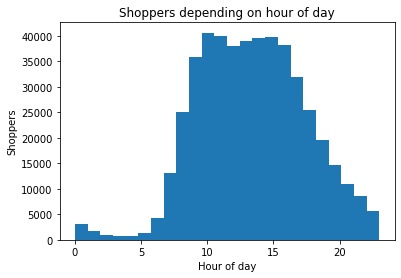

In [36]:
# We will create a histogram to visualize the most popular times that people shop for groceries
orders['order_hour_of_day'].plot(kind='hist',
                                 bins=24,
                                 title='Shoppers depending on hour of day',
                                 xlabel='Hour of day',
                                 ylabel='Shoppers',)

plt.xlabel('Hour of day')
plt.ylabel('Shoppers')
plt.show()

**Observations:**
It looks like the most common time of day that people are shopping, is between the 9am-4pm time frame.

### [A3] What day of the week do people shop for groceries?

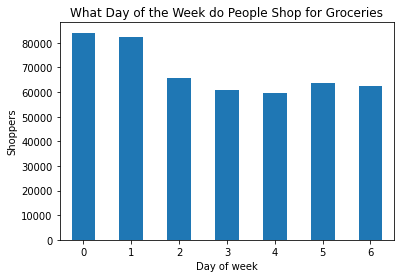

In [37]:
# We will create bar chart for this, as there are only 7 columns to show

# creating a new series for plotting, grouping all of the order_ids for each order_dow value

dow_plot = orders.groupby('order_dow')['order_id'].count()


dow_plot.plot(kind='bar', title='What Day of the Week do People Shop for Groceries', rot=0)


plt.xlabel('Day of week')
plt.ylabel('Shoppers')
plt.show()

**Observations:**

It seems that the most popular days of shopping are 0 and 1. Since we don't have an explanation on what number corresponds to what day, we may be able to make the assumption that most people will be doing their grocery shopping on the weekend. Therefore, day 0 could be Saturday and day 1 could be Sunday. We will keep this in mind for future analyses. 

### [A4] How long do people wait until placing another order?

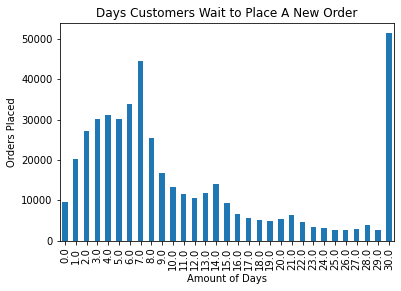

In [38]:
# First we will grab the total count of entries for each value of days_since_prior_order, so we can chart the frequency
placing_another = orders['days_since_prior_order'].value_counts().sort_index()

# Creating a bar graph to get a look at each individual value
placing_another.plot(kind='bar',
                     title='Days Customers Wait to Place A New Order',
                     xlabel='Amount of Days',
                     ylabel='Orders Placed')

plt.show()

**Observations:**

Judging by the amount of orders exactly at 30, compared to the frequency of values around it (such as anything from 22-29), I am going to make the assumptiont that days_since_prior_order maxes out at 30, and anything over 30, is considered 30. 

If we exclude that (since it is likely overflow of many different actual values), it looks like 7 days is the most common wait time before placing a new order. This makes sense, as most people likely have a routine where they have a 'grocery day' that they take care of the grocery shopping for the upcoming week.


# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

In [39]:
# We will create series for each day requested for the distribution
wednesdays = orders.query('order_dow == 4')['order_hour_of_day'].value_counts()

In [40]:
saturdays = orders.query('order_dow == 0')['order_hour_of_day'].value_counts()

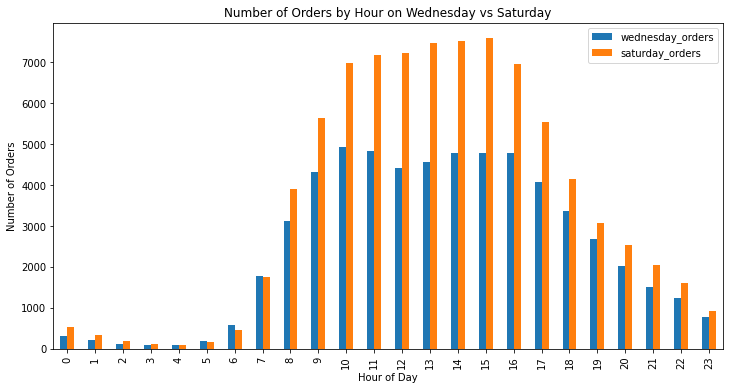

In [41]:
# we will created a concatenated data frame from the two series we grabbed of each of the orders per day
# for wednesday and saturday

concat_data = pd.concat([wednesdays, saturdays], axis='columns')
concat_data.columns = ['wednesday_orders', 'saturday_orders']

# we will created a bar chart here to show the clear orders for each hour

concat_data.plot(kind='bar',
                 y=['wednesday_orders', 'saturday_orders'],
                 title='Number of Orders by Hour on Wednesday vs Saturday',
                 xlabel='Hour of Day',
                 ylabel='Number of Orders',
                 figsize=(12,6))

plt.show()

**Observations**

Looking at this distribution, it seems the assumed value for Saturday is significantly more popular for orders than wednesday. Nearly every hour is more popular on the perceived Saturday vs Wednesday. 

This is further supporting the assumption that Saturday is 0 and Sunday is 1

### [B2] What's the distribution for the number of orders per customer?

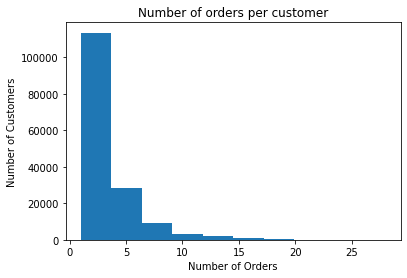

In [42]:
orders_per_customer = orders.groupby('user_id')['order_number'].count()


orders_per_customer.plot(kind='hist',
                         title='Number of orders per customer')

plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')

plt.show()

**Observations**

It looks like an overwhelming majority of users have less than 5 orders. I would estimate that perhaps a lot of users signed on for a special offer and placed one or two orders, and then did not use the service again. 

### [B3] What are the top 20 popular products (display their id and name)?

In [43]:
# first, we will take a slice from order_products to grab a count of all order_ids grouped up by product ids,
# so we can establish the top 20 popular products

# we had to use to_frame() in order to turn the resulting series into a dataframe, otherwise merge() would
# not work, as it is only available for dataframes

popular_product_id = order_products['product_id'].value_counts().to_frame()

# merging top_products to products to get product name
top_products = popular_product_id.merge(products, how='inner', left_index=True, right_on='product_id')

# resetting the index to start fresh
top_products = top_products.reset_index()

# formatting the dataframe to present data easier. 
# we removed the duplicate index column, the duplicate product id column, and changed the name of
# the "product_id_x" column to represent what it was, the value_count is each product id instance per order
# effectively making it total purchases

top_products = top_products.drop('product_id_y', axis='columns')
top_products = top_products.drop('index', axis='columns')
top_products = top_products.rename(columns={'product_id_x': 'total_purchases'})
top_products.head(20)


,product_id,total_purchases,product_name,aisle_id,department_id
0,24852,66050,Banana,24,4
1,13176,53297,Bag of Organic Bananas,24,4
2,21137,37039,Organic Strawberries,24,4
3,21903,33971,Organic Baby Spinach,123,4
4,47209,29773,Organic Hass Avocado,24,4
5,47766,24689,Organic Avocado,24,4
6,47626,21495,Large Lemon,24,4
7,16797,20018,Strawberries,24,4
8,26209,19690,Limes,24,4
9,27845,19600,Organic Whole Milk,84,16


**Observations**

The most popular ordered items are all fruits/vegetables. This makes sense, these are all perishable items, so they likely need ordered frequently by many people. 

Also interestingly, 15 out of the top 20 items are organic produce, which is more expensive that its non-organic counterpart. Unless this data is specificaly from stores that offer only organic products, it may show that customers of instacart are more likely to purchase organic produce vs non-organic. 


# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

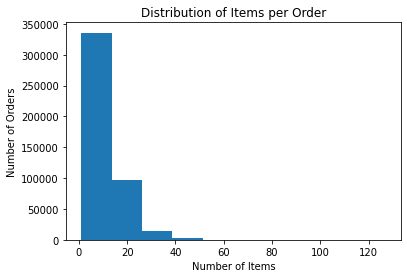

In [44]:
# Since we are looking for items per order, we will take a slice and group by order_id, and see the count of
# all product_ids associated with each order_id. This will be the relationship we are looking for
items_per_order = order_products.groupby('order_id')['product_id'].count()

# generating a histogram, since we are looking for the distribution of outcomes
items_per_order.plot(kind='hist',
                    bins=10,
                    title='Distribution of Items per Order')

# have had trouble settle x and y axis names in the plot() method, so doing it here
plt.xlabel('Number of Items')
plt.ylabel('Number of Orders')
plt.show()

In [45]:
# using the mean() method to calculate the average items per order
mean_items_per_order = items_per_order.mean()

print("Customers are typically buying", mean_items_per_order.round().astype(int), "items in one order.")


Customers are typically buying 10 items in one order.


**Observations**

Comparing the results of the average items per order with the histogram, we can assume the mean is correct, that the average items per order is 10. That seems to be accepted within the distribution as well. 

I chose to round the mean to a whole number because its value was so close to 10, and you can't really purchase a fraction of an item. 

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

### [C3] For each product, what proportion of its orders are reorders?

In [46]:
# calculating the number of reorders for each product id
reorders = order_products.groupby('product_id')['reordered'].sum()

# calculating the total number of orders for each product id
total_orders = order_products.groupby('product_id')['order_id'].count()

# we can calculate the proportion simply by taking the mean
reorder_proportion = order_products.groupby('product_id')['reordered'].mean()

# Creating a data frame with all of the relevent data points 
data_to_display = pd.DataFrame({
    'Total orders': total_orders,
    'Reorders': reorders,
    'Reorder proportion': reorder_proportion
}).reset_index()

print()
display(data_to_display)

,product_id,Total orders,Reorders,Reorder proportion
0,1,280,158,0.564286
1,2,11,0,0.000000
2,3,42,31,0.738095
3,4,49,25,0.510204
4,7,2,1,0.500000
...,...,...,...,...
45568,49690,5,4,0.800000
45569,49691,72,31,0.430556
45570,49692,12,5,0.416667
45571,49693,25,11,0.440000


In [47]:
# merging with the products dataframe so we can get product names
data_to_display = data_to_display.merge(products, on='product_id', how='inner')[['product_id', 'product_name', 'Total orders', 'Reorders', 'Reorder proportion']]


display(data_to_display.head())

,product_id,product_name,Total orders,Reorders,Reorder proportion
0,1,Chocolate Sandwich Cookies,280,158,0.564286
1,2,All-Seasons Salt,11,0,0.000000
2,3,Robust Golden Unsweetened Oolong Tea,42,31,0.738095
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,49,25,0.510204
4,7,Pure Coconut Water With Orange,2,1,0.500000


**Observations**

We now have a list of the products and their reorder proportions. We could perform additional analysis now that this data is calculated, such as finding the most commonly reordered items (items that have the most total reorders), or finding the items that have the highest proportion of reorders. This may be useful to investigate why certain items may not be reordered as frequently. 

### [C4] For each customer, what proportion of their products ordered are reorders?

### [C5] What are the top 20 items that people put in their carts first? 

# Project Conclusions
Overall, we did a lot of good work with these datasets. After cleaning the data, we were able to analyze it for some interesting finds. 

We have distributions of what time of day people are most commonly shopping for groceries. 

We found the most popular days that people shop. Those values in the data are 0 and 1. That's not entirely helpful since we don't know the day that corresponds to each value in that column, but we may be able to do some inference from it. If we assume people do most of their shopping on the weekends, then the scale starts at 0 with Saturday. It may start with Sunday as 0, or maybe even Monday with 0. It is anyone's guess. But we have the analysis done, so if that mystery is ever solved, we have the data to use with it.

The most common wait time for the next order from a customer is 7 days or 30 days. Depending on how the data is collected, either anything past 30 is counted as 30, or the most amount of people orders once per month. We would likely need insight from the data collection to understand this further.

We have learned that an overwhelming majority of customers have placed 10 orders or fewer. 

The average amount of items per order is 10, and most customers don't seem to go beyond 20.

We have also generated a list of the top 20 most popular products. This could help Instacart know what products to market better from stores, knowing what is already popular, or what may need a boost in advertising/showing off to customers.

This was a great deep dive into the world of Instacart, and I think even more could be done with this dataset in the future once I continue to learn more. 